## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [3]:
bool(X.isnull().sum().sum())

False

Пропущенных значений и категориальных признаков нет

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Stratify нужен, чтобы выборка была сбалансирована
Вместо np.random.seed() я использовал параметр random_state.

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [6]:
res = pd.DataFrame(columns=['NN', 'Train', 'Test'])
clfs = []

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=list(X_train.columns))
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=list(X_test.columns))

Ks = [1, 3, 5, 10, 15, 25]
for K in Ks:
    clf = KNeighborsClassifier(n_neighbors=K, p=2, n_jobs=10)
    clf.fit(X_train_scaled[['alcohol', 'magnesium']], y_train)
    y_train_predicted = clf.predict(X_train_scaled[['alcohol', 'magnesium']])
    y_test_predicted = clf.predict(X_test_scaled[['alcohol', 'magnesium']])
    
    res.loc[len(res.index)] = [str(K), round(np.mean(y_train == y_train_predicted), 2), round(np.mean(y_test == y_test_predicted), 2)]
    clfs.append(clf)

res['NN'] = res['NN'].astype(int)
display(res.style.hide())

NN,Train,Test
1,1.000000,0.560000
3,0.800000,0.630000
5,0.780000,0.630000
10,0.750000,0.650000
15,0.720000,0.630000
25,0.690000,0.690000


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [7]:
!pip install mlxtend

You should consider upgrading via the 'c:\users\nprud\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [8]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

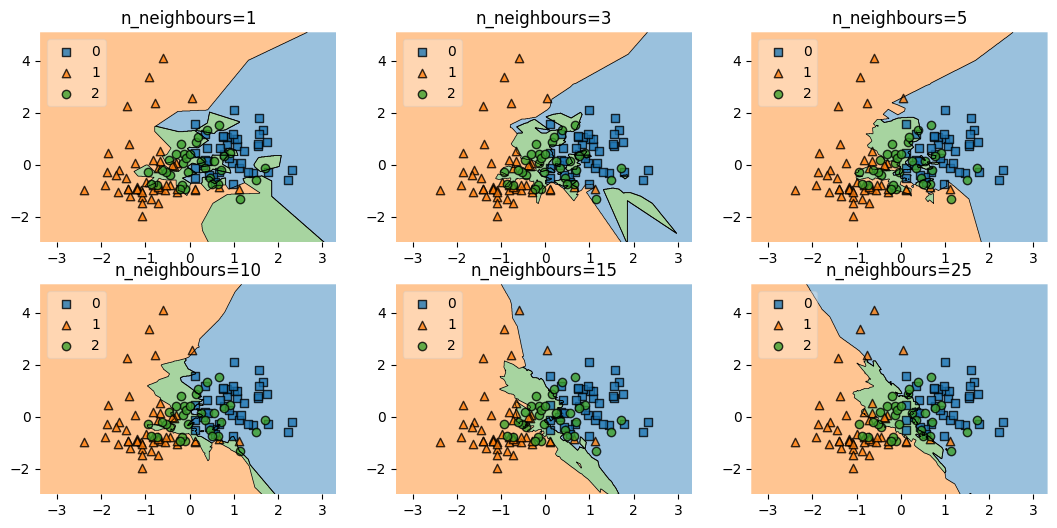

In [9]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(13,6))

for clf, K, grd in zip(clfs,
                         Ks,
                         itertools.product([0, 1], [0, 1, 2])):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(X_train_scaled[['alcohol', 'magnesium']]), y=y_train, clf=clf, legend=2)
    plt.title(f'n_neighbours={K}')

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

Я считаю, что оптимально использовать k = 10, потому что в таком случае у нас хорошая точность(65%) на тестовой выборке и геометрия фигур на графике из задания 1.5 наиболее хорошо делит признаки(красное - слева, зелёное - посередине,  синее - справа). 
При k = 1 модель явно переобучена, так как на обучающей выборке точность - 100%, а на тестовой в 2 раза хуже - 56%.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

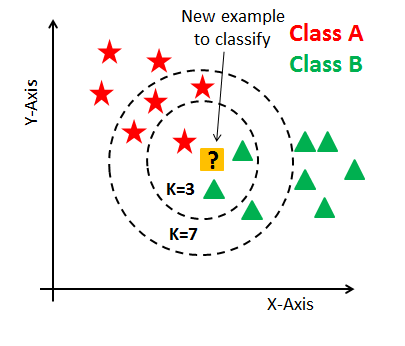

In [10]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X_test):
        predict = np.array([])
        for x in X_test:
            dist = self.count_distance(self.X, x)
            nearest_y = self.y[np.argsort(dist)[:self.k]]
            predict = np.append(predict, Counter(nearest_y).most_common(1)[0][0])
        return predict

    def count_distance(self, X, point):
        return np.sqrt(np.sum(np.square(X - point), axis=1))

In [11]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [12]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [13]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [14]:
print('Пропущенные значения:', bool(X.isnull().sum().sum()))

del data['Unnamed: 0']
data.head()

Пропущенные значения: False


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Не нужен столбец 'Unnamed: 0', он дублирует индексы.

**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [15]:
data.corr(numeric_only=True)['price']

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

Больше всего коррелируют масса(carat) и размеры(x y z).

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [16]:
data = pd.get_dummies(data, dtype=int)
data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [17]:
import seaborn as sns
X = data.drop('price', axis=1)
y = data['price']


bins = np.linspace(y.min() - 1, y.max() + 1, 20)
y_binned = np.digitize(y, bins)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y_binned)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=list(X_train.columns))
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=list(X_test.columns))

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [19]:
from sklearn.linear_model import LinearRegression

def MSE(y, y_pred):
    return ((y - y_pred) ** 2).mean()

lr = LinearRegression().fit(X_train_scaled, y_train)

print('Train:', MSE(y_train, lr.predict(X_train_scaled)))
print('Test:', MSE(y_test, lr.predict(X_test_scaled)))


Train: 1299916.7601132193
Test: 1229542.3600824503


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [20]:
coef = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficients'])
print(coef)

               Coefficients
carat          5.251458e+03
depth         -8.753214e+01
table         -7.199739e+01
x             -1.208939e+03
y              1.682477e+02
z             -3.132694e+01
cut_Fair       3.515710e+15
cut_Good       5.876210e+15
cut_Ideal      1.004264e+16
cut_Premium    8.920862e+15
cut_Very Good  8.528456e+15
color_D       -3.345163e+15
color_E       -3.902603e+15
color_F       -3.867039e+15
color_G       -4.138069e+15
color_H       -3.658031e+15
color_I       -3.048792e+15
color_J       -2.261618e+15
clarity_I1    -1.149084e+15
clarity_IF    -1.759044e+15
clarity_SI1   -4.271385e+15
clarity_SI2   -3.749275e+15
clarity_VS1   -3.591686e+15
clarity_VS2   -4.200012e+15
clarity_VVS1  -2.498966e+15
clarity_VVS2  -2.908623e+15


Превышают carat x y 

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [21]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=10).fit(X_train_scaled, y_train)
ridge = linear_model.Ridge(alpha=10).fit(X_train_scaled, y_train)

lasso_coef = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficients'])
ridge_coef = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficients'])

print(lasso_coef)
print(ridge_coef)

               Coefficients
carat           4808.697445
depth            -53.628500
table            -47.981720
x               -602.623333
y                 -0.000000
z                -46.616519
cut_Fair        -126.046173
cut_Good         -41.687653
cut_Ideal         46.123751
cut_Premium        0.000000
cut_Very Good     -0.000000
color_D          150.510157
color_E           89.960379
color_F           62.759544
color_G           -0.000000
color_H         -170.050335
color_I         -277.329565
color_J         -406.561415
clarity_I1      -485.164485
clarity_IF       191.096336
clarity_SI1     -258.034635
clarity_SI2     -581.380120
clarity_VS1      101.026757
clarity_VS2       -0.000000
clarity_VVS1     178.349133
clarity_VVS2     194.863670
               Coefficients
carat           5220.596400
depth            -81.746065
table            -61.596147
x              -1110.997140
y                116.806700
z                -47.269028
cut_Fair        -124.241987
cut_Good         -41

Сильно уменьшились веса категориальных признаков. В изначальной регрессии проблема мультиколлинеарности проявлялась очень сильно.

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

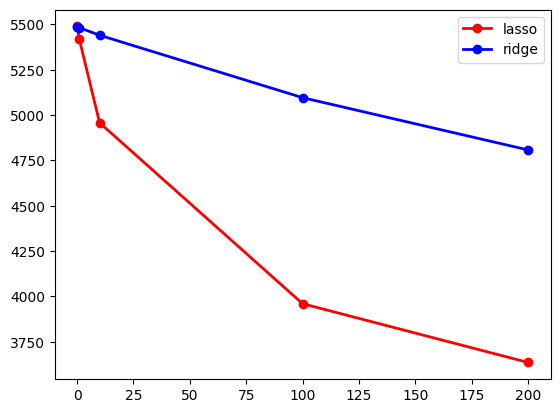

In [22]:
alphas = [0.1, 1, 10, 100, 200]
lasso_coefs = []
ridge_coefs = []

for alpha in alphas:
    lasso = linear_model.Lasso(alpha=alpha).fit(X_train_scaled, y_train)
    ridge = linear_model.Ridge(alpha=alpha).fit(X_train_scaled, y_train)

    lasso_coefs.append(np.linalg.norm(lasso.coef_))
    ridge_coefs.append(np.linalg.norm(ridge.coef_))

fig, ax = plt.subplots()


ax.plot(alphas, lasso_coefs, 'o-r', label="lasso", lw=2, mec='r', mew=2, ms=5)
ax.plot(alphas, ridge_coefs, 'o-b', label="ridge", lw=2, mec='b', mew=2, ms=5)
ax.legend()

plt.show()

Lasso агрессивней уменьшает веса. Она склонна занулять большие веса, поэтому она часто используется для отбора переменных.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [23]:
lasso_cv = linear_model.LassoCV(cv=5, random_state=42, alphas=alphas).fit(X_train_scaled, y_train)
arr = np.array(lasso_cv.mse_path_)

df = pd.DataFrame(arr.mean(axis=1), index=alphas[::-1], columns=['mean MSE'])
display(df)

,mean MSE
200.0,1.969309e+06
100.0,1.549159e+06
10.0,1.321739e+06
1.0,1.313609e+06
0.1,1.337292e+06


Наибольшее качество даёт alpha = 1

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [24]:
lasso = linear_model.Lasso(alpha=1).fit(X_train_scaled, y_train)
lasso_coef = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficients'])
print(lasso_coef)

               Coefficients
carat           5212.972014
depth            -82.307289
table            -60.872910
x              -1013.930794
y                 17.400631
z                -38.484788
cut_Fair        -130.818101
cut_Good         -50.981809
cut_Ideal         35.998490
cut_Premium        0.000000
cut_Very Good    -15.588198
color_D          166.571827
color_E          105.127036
color_F           78.501384
color_G           -0.000000
color_H         -176.499304
color_I         -288.980087
color_J         -420.100543
clarity_I1      -497.067845
clarity_IF       197.489456
clarity_SI1     -257.018486
clarity_SI2     -588.967843
clarity_VS1      113.354777
clarity_VS2       -0.000000
clarity_VVS1     183.163408
clarity_VVS2     201.439459


Самым информативным оказался признак carat, что логично, цена бриллианта во многом зависит от его веса. Самыми неинформативными оказались clarity_VS2(базированный уровень чистоты для алмазов, чище - дороже, грязнее - дешевле), color_G(обычный  почти бесцветный алмаз, более бесцветные D E F- дороже, более мутные H I J - дешевле), cut_Premium(тоже базированный уровень обработки, выше - Ideal, ниже - Good и Fair).

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [25]:
print('Linear:', MSE(y_test, lr.predict(X_test_scaled)))
print('Lasso:', MSE(y_test, lasso.predict(X_test_scaled)))

Linear: 1229542.3600824503
Lasso: 1225591.6463923762


Лучше использовать Lasso-регрессию. Она лучше, так как в ней специально подобрались веса таким образом, чтобы ошибка была меньше.